# Intro to Regression
We're going through a few regression exercises that will help you see how regression works in Python.

<img src="./imgs/regression_ml.png" />

 

## Objectives: 
At the end of this notebook the students should:
- Be able to visualize data
- Look for correlations and multicollinearity
- Understand how linear regression models work
- Interpret basic regression statistics like R^2
- Do basic feature engineering and selection to improve models


Be able to create linear regression in:
- [***statsmodels***](http://statsmodels.sourceforge.net/): a package mainly best at doing regressions with traditional R formula syntax
- [***scikit-learn***](http://scikit-learn.org/dev/index.html): This is the main machine learning package we'll be using throughout the course.  It has a multitude of machine learning algorithms and helpful machine learning pipeline tools.  sklearn has a tremendous amount of functionality, to get the most out of this course it will help to really explore the depth of the documentation on your own and watch as you understand more and more of the functionality as the course progresses.


Gain familiarity with the following:
- ***R formulas***: R formulas are a convenient way for encapsulating functional relationships for regressions
- [***seaborn***](http://stanford.edu/~mwaskom/software/seaborn/): We'll use seaborn for **visualization** as we go along
- [***Variable Preprocessing and Polynomial Regression***](http://scikit-learn.org/dev/modules/preprocessing.html#preprocessing) with scikit-learn:  We'll be **"standardizing"** many of our variables to yield better model data.  We'll show how the "linear" models can be extended to basically any type of function by using functions of the different fields as the inputs to the linear model.

## Data
We'll take a look at: [Car price predictor dataset](https://www.kaggle.com/datasets/ananaymital/us-used-cars-dataset)    
[download subset of data here](https://console.cloud.google.com/storage/browser/intro_to_machine_learning;tab=objects?forceOnBucketsSortingFiltering=false&project=hybrid-elixir-210115&prefix=&forceOnObjectsSortingFiltering=false)

# Setup
Try running the following imports and check that they all import successfully.  If they do not, install commands are given below. If necessary, at a command line window use `pip` to install the ones that are failing for you and then retry the imports.

In [1]:
# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

## Installations (if necessary)

```` bash
conda install pandas numpy statsmodels seaborn scikit-learn
````

# Used Car Data
We will be working with US Used Car **price** data to demonstrate a few basic features of ***statsmodels*** and ***seaborn*** and how they might be used in a data science workflow for regression.

The dataset includes numerous predictive features we can use to predict Used car prices.

Let's load the dataset in using ***pandas*** and take a look at it.  Here we use [***pandas.read_table***](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html) to load the data.

 <img src="./imgs/saab.png" />

In [2]:
import datetime as dt
pd.options.display.max_columns = 500

In [19]:
# Load data  
df=pd.read_csv('data/used_car_final.csv',index_col=0)

/var/folders/jn/625fnnbs1jg77y82ld96q65w0000gn/T/ipykernel_2249/2254982842.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('data/used_car_final.csv',index_col=0)


In [20]:
df.columns

Index(['vin', 'back_legroom', 'bed', 'bed_height', 'bed_length', 'body_type',
       'cabin', 'city', 'city_fuel_economy', 'combine_fuel_economy',
       'daysonmarket', 'dealer_zip', 'description', 'engine_cylinders',
       'engine_displacement', 'engine_type', 'exterior_color', 'fleet',
       'frame_damaged', 'franchise_dealer', 'franchise_make', 'front_legroom',
       'fuel_tank_volume', 'fuel_type', 'has_accidents', 'height',
       'highway_fuel_economy', 'horsepower', 'interior_color', 'isCab',
       'is_certified', 'is_cpo', 'is_new', 'is_oemcpo', 'latitude', 'length',
       'listed_date', 'listing_color', 'listing_id', 'longitude',
       'main_picture_url', 'major_options', 'make_name', 'maximum_seating',
       'mileage', 'model_name', 'owner_count', 'power', 'price', 'salvage',
       'savings_amount', 'seller_rating', 'sp_id', 'sp_name', 'theft_title',
       'torque', 'transmission', 'transmission_display', 'trimId', 'trim_name',
       'vehicle_damage_category', 'whe

In [22]:
df=df[['vin', 
       'city_fuel_economy', 
       'daysonmarket', 'dealer_zip',  'engine_cylinders',
       'engine_displacement', 'engine_type', 
        'franchise_dealer', 'franchise_make', 
        'fuel_type', 'has_accidents', 
       'highway_fuel_economy', 'horsepower', 
        'is_new', 'is_oemcpo', 'latitude', 'length',
       'listed_date',  'longitude',
        'make_name', 'maximum_seating',
       'mileage', 'model_name', 'owner_count', 'power', 'price', 'salvage',
       'savings_amount', 'seller_rating', 
       'torque', 'transmission', 
       'vehicle_damage_category', 'wheel_system', 'wheel_system_display',
       'wheelbase', 'width', 'year']]

In [25]:
df=df.sample(225000)
df.to_csv('data/data_small_final.csv')

In [3]:
# Load data  
df=pd.read_csv('data/data_small_final.csv',index_col=0)

/var/folders/jn/625fnnbs1jg77y82ld96q65w0000gn/T/ipykernel_2249/2083726088.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('data/data_small_final.csv',index_col=0)


In [6]:
df.dtypes

vin                     object
back_legroom            object
bed                     object
bed_height              object
bed_length              object
                         ...  
wheel_system            object
wheel_system_display    object
wheelbase               object
width                   object
year                     int64
Length: 66, dtype: object

In [26]:
df.describe()

,city_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,latitude,longitude,mileage,owner_count,price,savings_amount,seller_rating,vehicle_damage_category,year
count,188128.000000,225000.000000,212120.000000,188128.000000,212120.000000,225000.000000,225000.000000,2.140020e+05,111402.000000,2.250000e+05,225000.000000,222014.000000,0.0,225000.000000
mean,22.711000,75.668382,2966.873468,29.487057,247.763455,36.979490,-90.666080,3.121943e+04,1.533375,2.989133e+04,551.637662,4.270687,NaN,2017.734876
std,8.798542,109.152262,1350.378436,7.769239,90.281676,4.986773,13.907174,4.556432e+04,0.925868,1.970399e+04,1063.528282,0.512163,NaN,4.129016
min,8.000000,0.000000,700.000000,10.000000,70.000000,18.398800,-157.902000,0.000000e+00,1.000000,4.840000e+02,0.000000,1.000000,NaN,1927.000000
25%,18.000000,14.000000,2000.000000,25.000000,175.000000,33.509400,-97.088200,6.000000e+00,1.000000,1.843800e+04,0.000000,4.000000,NaN,2017.000000
50%,21.000000,35.000000,2500.000000,29.000000,243.000000,37.818500,-87.276400,8.541000e+03,1.000000,2.639500e+04,0.000000,4.337838,NaN,2020.000000
75%,26.000000,81.000000,3600.000000,33.000000,300.000000,40.981700,-80.491600,4.374875e+04,2.000000,3.811700e+04,785.000000,4.600000,NaN,2020.000000
max,127.000000,2976.000000,8400.000000,127.000000,808.000000,61.161800,-66.078500,1.111111e+06,19.000000,2.698500e+06,68745.000000,5.000000,NaN,2021.000000


### Step # 1 )  Basic Data Cleaning

In [28]:
df.vin.value_counts().head()

2T3F1RFV7KW018380    2
1GAZG1FGXF1182508    1
2HKRW2H94LH648954    1
5UX2V1C03L9B97629    1
1J4GW48N54C357340    1
Name: vin, dtype: int64

In [27]:
df=df.drop_duplicates()
len(df)

225000

In [29]:
df[df.vin=='2T3F1RFV7KW018380']

,vin,city_fuel_economy,daysonmarket,dealer_zip,engine_cylinders,engine_displacement,engine_type,franchise_dealer,franchise_make,fuel_type,has_accidents,highway_fuel_economy,horsepower,is_new,is_oemcpo,latitude,length,listed_date,longitude,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,torque,transmission,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
2000042,2T3F1RFV7KW018380,25.0,20,99006,I4,2500.0,I4,False,NaN,Gasoline,False,33.0,203.0,False,NaN,47.9408,180.9 in,2020-08-22,-117.473,Toyota,5 seats,39183.0,RAV4,2.0,"203 hp @ 6,000 RPM",25495.0,False,758,4.453125,"184 lb-ft @ 5,000 RPM",A,NaN,AWD,All-Wheel Drive,105.9 in,73 in,2019
2000022,2T3F1RFV7KW018380,25.0,20,99006,I4,2500.0,I4,False,NaN,Gasoline,False,33.0,203.0,False,NaN,47.9408,180.9 in,2020-08-22,-117.473,Toyota,5 seats,39183.0,RAV4,2.0,"203 hp @ 6,000 RPM",25495.0,False,758,4.453125,"184 lb-ft @ 5,000 RPM",A,NaN,AWD,All-Wheel Drive,105.9 in,73 in,2019


In [30]:
df=df.drop(2000022)

In [42]:
df.drop(columns='vehicle_damage_category',axis=1,inplace=True)

In [31]:
df.set_index('vin',inplace=True)

### Step # 2 ) Drop object columns, 'id'  column (for now) 

In [43]:
## Let's start off by only using numerical vals 
num_cols=df.dtypes[df.dtypes!='object'].index
df_num=df[num_cols]

for i in df_num.columns:
    print(i)

city_fuel_economy
daysonmarket
engine_displacement
franchise_dealer
highway_fuel_economy
horsepower
is_new
latitude
longitude
mileage
owner_count
price
savings_amount
seller_rating
year


In [44]:
df_num.head()

,city_fuel_economy,daysonmarket,engine_displacement,franchise_dealer,highway_fuel_economy,horsepower,is_new,latitude,longitude,mileage,owner_count,price,savings_amount,seller_rating,year
vin,,,,,,,,,,,,,,,
1GAZG1FGXF1182508,11.0,33,6000.0,True,16.0,342.0,False,41.1836,-95.9359,44491.0,2.0,20785.0,1938,4.750000,2015
JTJBM7FX0J5202882,15.0,7,4600.0,True,18.0,301.0,False,40.9790,-81.4877,21487.0,1.0,46995.0,250,4.500000,2018
1FM5K8HC3LGA01518,18.0,369,3000.0,True,24.0,365.0,True,34.4493,-84.4483,90.0,NaN,52306.0,0,4.205882,2020
YV4BR0DL3M1675891,NaN,12,2000.0,True,NaN,400.0,True,41.7701,-72.6558,13.0,NaN,67625.0,0,4.578947,2021
JM3KFBEY5K0697516,22.0,8,2500.0,True,27.0,250.0,False,38.3950,-82.4155,12437.0,1.0,32985.0,877,4.625000,2019


In [45]:
# Do some shifting, so that price is all the way to the left
new_col_list=list(df_num.columns[-4:])
new_col_list.extend(df_num.columns[:-4])

# How many rows and columns does the dataset have?
df_num=df_num[new_col_list]

In [46]:
pd.set_option('display.max_columns', 500)

df_num.describe()

,price,savings_amount,seller_rating,year,city_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,latitude,longitude,mileage,owner_count
count,2.249990e+05,224999.000000,222013.000000,224999.000000,188127.000000,224999.000000,212119.000000,188127.000000,212119.000000,224999.000000,224999.000000,2.140010e+05,111401.000000
mean,2.989135e+04,551.636745,4.270686,2017.734870,22.710988,75.668630,2966.875669,29.487038,247.763666,36.979442,-90.665961,3.121939e+04,1.533370
std,1.970403e+04,1063.530557,0.512164,4.129025,8.798563,109.152441,1350.381239,7.769255,90.281836,4.986730,13.907090,4.556442e+04,0.925871
min,4.840000e+02,0.000000,1.000000,1927.000000,8.000000,0.000000,700.000000,10.000000,70.000000,18.398800,-157.902000,0.000000e+00,1.000000
25%,1.843800e+04,0.000000,4.000000,2017.000000,18.000000,14.000000,2000.000000,25.000000,175.000000,33.509400,-97.088200,6.000000e+00,1.000000
50%,2.639500e+04,0.000000,4.337838,2020.000000,21.000000,35.000000,2500.000000,29.000000,243.000000,37.818500,-87.276400,8.541000e+03,1.000000
75%,3.811700e+04,785.000000,4.600000,2020.000000,26.000000,81.000000,3600.000000,33.000000,300.000000,40.981700,-80.491600,4.374900e+04,2.000000
max,2.698500e+06,68745.000000,5.000000,2021.000000,127.000000,2976.000000,8400.000000,127.000000,808.000000,61.161800,-66.078500,1.111111e+06,19.000000


### Step #3 : Perform Initial EDA

### Without EDA we are .. 

<img src="./imgs/flying_blind.png" />


Remember that without conducting a proper EDA we are flying blind.   
Be curious about your data!    
What are the distributions? 

### Visualizing with Seaborn
We see that we have 14 predictive features along with our response variable of price.
What are the correlations between the predictive features & price? 

#### Let's make a nice plot of our Response variable .. 

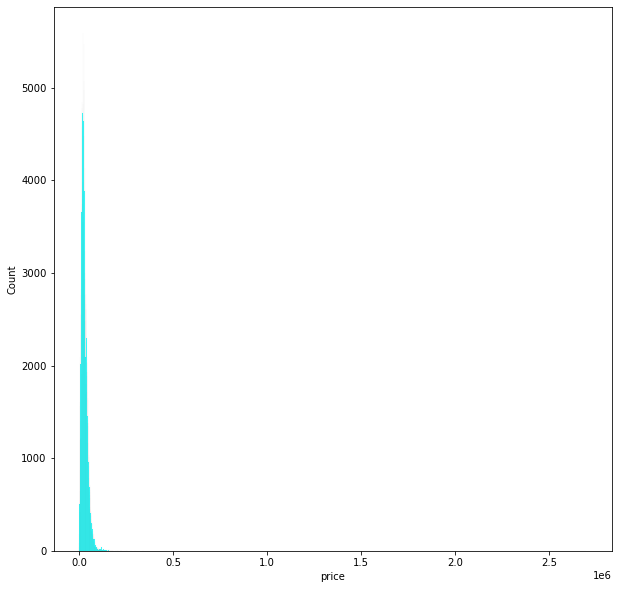

In [40]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.histplot(df_num.price,color='cyan');

In [41]:
# View the correlations
df_num.corr()

,price,savings_amount,seller_rating,vehicle_damage_category,year,city_fuel_economy,daysonmarket,engine_displacement,franchise_dealer,highway_fuel_economy,horsepower,is_new,latitude,longitude,mileage,owner_count
price,1.000000,-0.003585,0.066876,NaN,0.359798,-0.171204,0.060551,0.366938,0.280687,-0.246068,0.586959,0.374732,-0.023490,-0.026367,-0.443932,-0.219786
savings_amount,-0.003585,1.000000,0.011980,NaN,-0.193109,-0.101944,-0.076525,0.139258,-0.211935,-0.095937,0.159770,-0.508199,-0.005055,-0.008541,0.247206,-0.071019
seller_rating,0.066876,0.011980,1.000000,NaN,-0.047229,-0.039744,-0.001001,0.031126,-0.037507,-0.050312,0.062569,-0.038027,0.092201,0.005155,0.036295,0.006693
vehicle_damage_category,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,0.359798,-0.193109,-0.047229,NaN,1.000000,0.156295,0.000406,-0.139161,0.496485,0.146759,0.029604,0.558924,-0.068497,-0.015741,-0.776629,-0.587181
city_fuel_economy,-0.171204,-0.101944,-0.039744,NaN,0.156295,1.000000,0.007042,-0.663647,0.059543,0.940855,-0.670930,0.100059,-0.039071,-0.085009,-0.151234,-0.126135
daysonmarket,0.060551,-0.076525,-0.001001,NaN,0.000406,0.007042,1.000000,-0.045479,0.003756,-0.001583,-0.020608,0.172803,0.020843,0.013578,-0.084527,0.097073
engine_displacement,0.366938,0.139258,0.031126,NaN,-0.139161,-0.663647,-0.045479,1.000000,-0.061573,-0.692354,0.831082,-0.067601,-0.006648,-0.008744,0.151741,0.118825
franchise_dealer,0.280687,-0.211935,-0.037507,NaN,0.496485,0.059543,0.003756,-0.061573,1.000000,0.043062,0.024797,0.471030,0.003389,0.014670,-0.517789,-0.265533
highway_fuel_economy,-0.246068,-0.095937,-0.050312,NaN,0.146759,0.940855,-0.001583,-0.692354,0.043062,1.000000,-0.703269,0.058137,-0.062287,-0.081188,-0.138088,-0.124240


#### Correlation Map

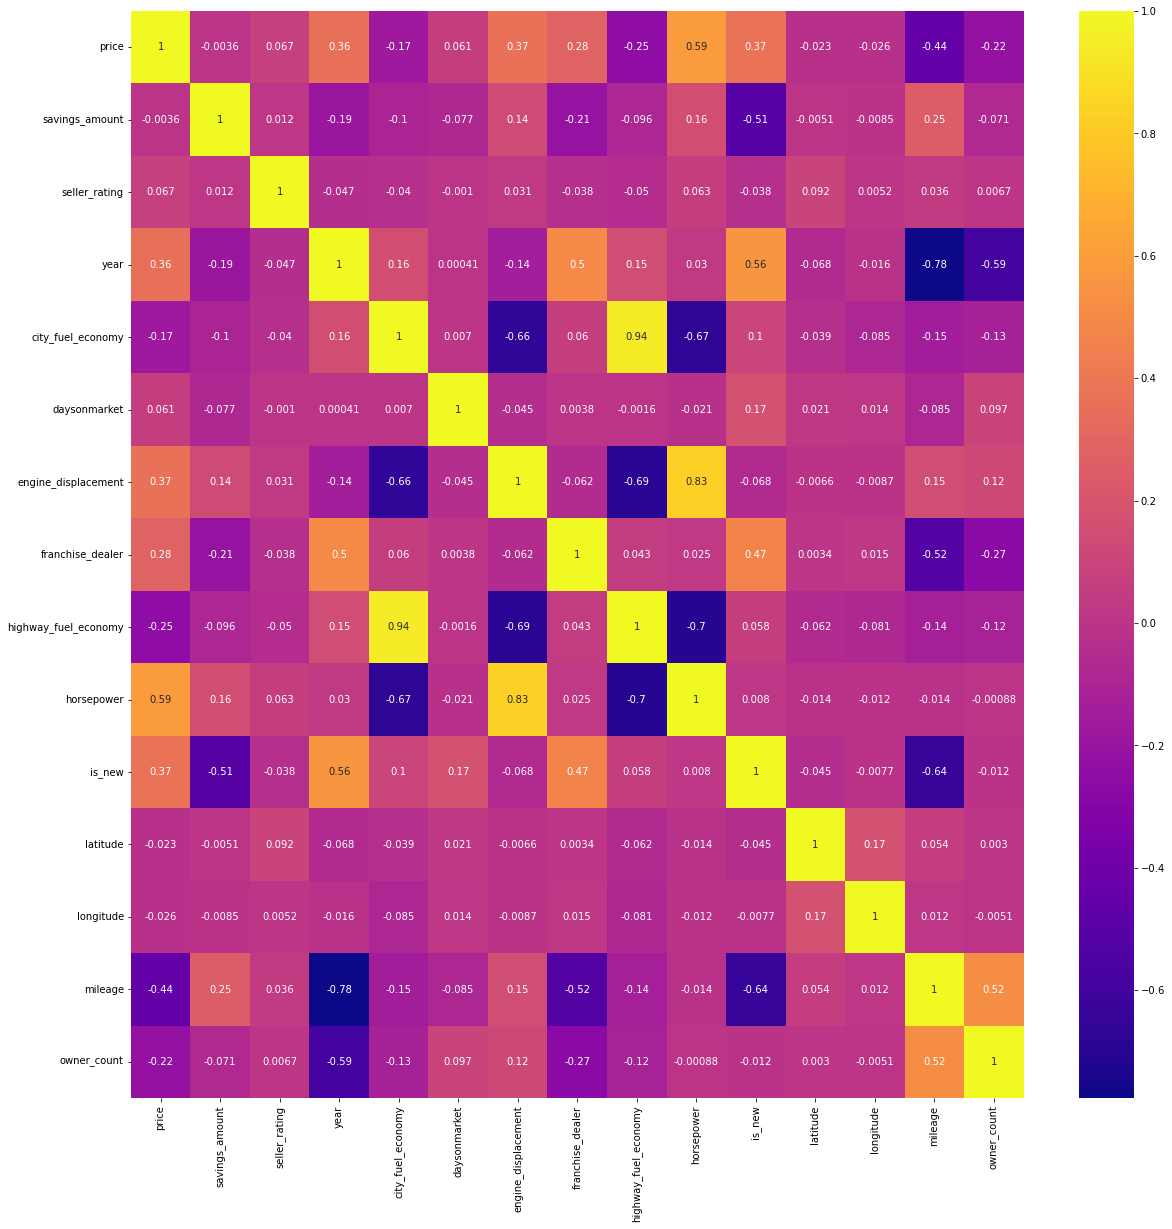

In [47]:
# example of a better corr matrix
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(df_num.corr(), cmap="plasma", annot=True, ax=ax);
# more cmaps: https://matplotlib.org/examples/color/colormaps_reference.html

### Correlation and Multicollinearity
We notice that some of the variables are highly correlated.  This is something we might want to take into consideration later.  When 2 predictor variables are highly correlated this is called [multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity) and it is something we want to watch out for as it can destabilize our model.  In the extreme case, when 2 predictors are perfectly correlated then there is absolutely nothing gained by making both variables part of our regression.

The other takeaway from this table is that some of our predictors are highly correlated with our ***target variable Y***.  This is a good thing, it means that these are the variables that we most likely want to include as part of our model as they explain a large amount of the variance in the target variable (correlation=R, variance_explained=R<sup>2</sup>).

Let's try to visualize these correlations all together by using the [***seaborn pairplot***](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html) function.

> What do you notice?

> Almost all correlations are positive, somewhat normal distributions, etc.

In [48]:
# close-up on correlations with Price, what do you think? 
df_num.corr().iloc[0]

price                   1.000000
savings_amount         -0.003585
seller_rating           0.066876
year                    0.359798
city_fuel_economy      -0.171204
daysonmarket            0.060551
engine_displacement     0.366938
franchise_dealer        0.280687
highway_fuel_economy   -0.246068
horsepower              0.586959
is_new                  0.374732
latitude               -0.023490
longitude              -0.026367
mileage                -0.443932
owner_count            -0.219786
Name: price, dtype: float64

### Pairplot Map

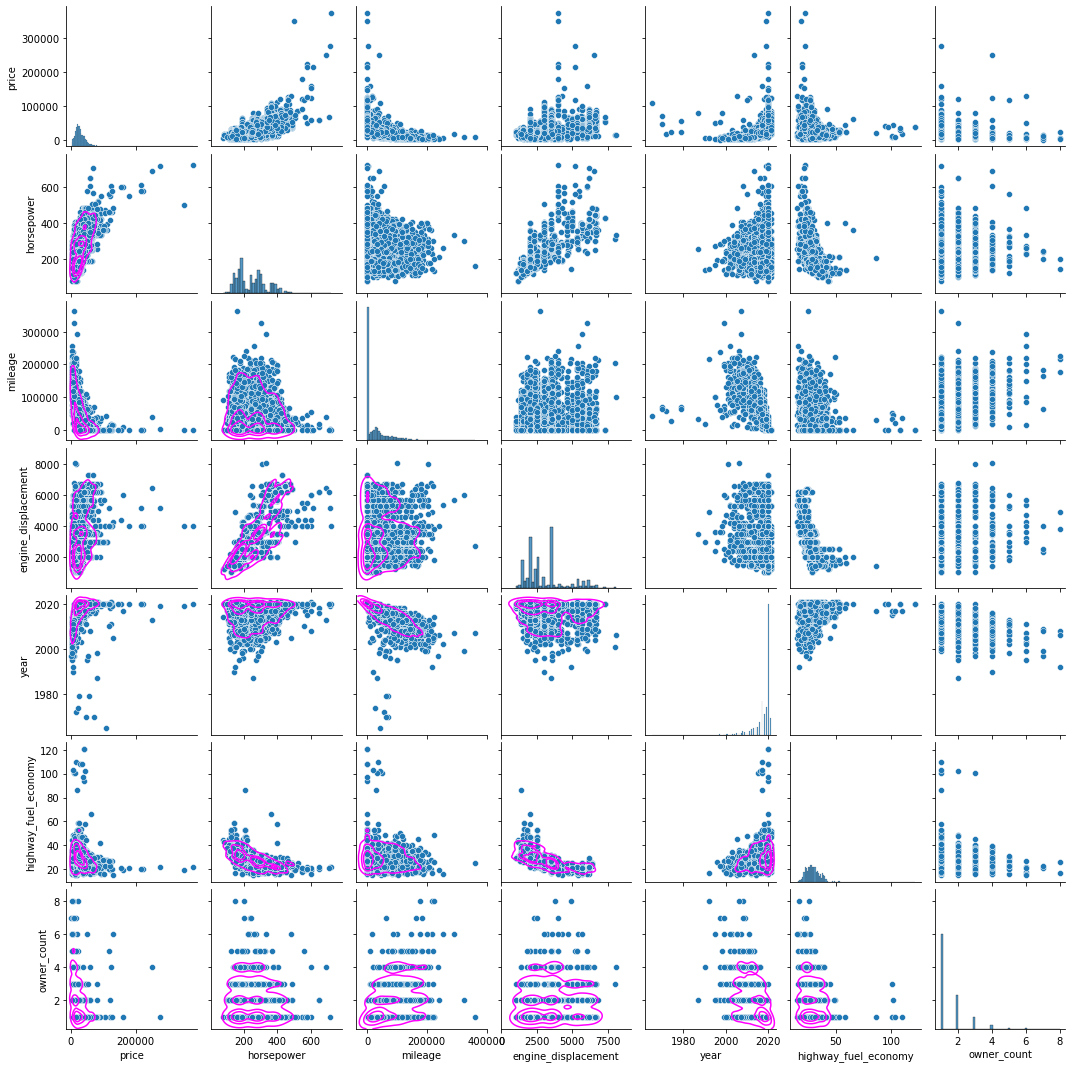

In [49]:
# Warning, takes 2 mins to run .. 
df_samp=df_num[['price','horsepower','mileage','engine_displacement','year','highway_fuel_economy','owner_count']].sample(5000)
g=sns.pairplot(df_samp,kind="scatter");
g.map_lower(sns.kdeplot, levels=4, color='magenta')
g.fig.set_size_inches(15,15)

### Ordinary Least Squares Regression with Statsmodels
Now that we have a feel for our data, let's jump right in and try a basic regression model.  

#### Statsmodels
We are going to use the [**`statsmodels`**](http://statsmodels.sourceforge.net/) library first.  `statsmodels` is a Python package for implementing [**linear models**](https://en.wikipedia.org/wiki/Linear_model), of which **Linear Regression** is one.  It has a bunch of nice features for evaluating and executing such models.  Essentially, a linear model is one that is a **linear function of the parameters**.  For Linear Regression, this means the parameter $\beta$ (note that here $\beta$ is a **vector** of parameters, which includes $\beta_0$, $\beta_1$, $\beta_2$, etc).  We'll discuss linear models generally later but for  now just accept that Linear Regression is one of these.

#### Modeling with Statsmodels
There are 2 main ways you can generate models with stats models:
- Via the `statsmodels.api` package
- Via the `statsmodels.formula.api` package

For both approaches, you'll need somewhere to use the R formula style formulas for defining the relationship between target variable and feature variables in your model.  ***Statsmodels*** uses [***patsy***](http://patsy.readthedocs.org/en/latest/) to convert this syntax into the proper data matrices for input into its linear models under the covers.  There are a variety of interactions and functions of variables that you can incorporate with this syntax, so feel free to check out the docs.

Here we'll just start by defining a regression model that takes as its inputs each of the *14* predictor variables.  The other parameter of course is the data that the model is to be built from, our pandas dataframe.

This first model fitting is done for you, it fits a multiple linear regression model of the following form (notice the use of [MathJax](https://www.mathjax.org/) for rendering such lovely math equations in markdown):

$$
\widehat{Y} = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \beta_4X_4 + \beta_5X_5 + \beta_6X_6 +\beta_7X_7 + \beta_8X_8 + \beta_9X_9 + \beta_10X_{10} + \beta_11X_{11} + \beta_12X_{12} + \beta_13X_{13}
$$

##### `statsmodels.api`
To use this method, you need to generate a **matrix** of **features**, **`X`** and a **vector** of **targets**, **`y`** where each row represents a single **observation**.  In statsmodels, you can do this with a call to **`patsy.dmatrices`**:


In [51]:
# Create your feature matrix (X) and target vector (y)

y, X = patsy.dmatrices('price~city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+highway_fuel_economy+horsepower+is_new+latitude+longitude+mileage+owner_count+savings_amount+seller_rating', data=df_num)
# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     4706.
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        07:28:08   Log-Likelihood:            -1.0021e+06
No. Observations:               91458   AIC:                         2.004e+06
Df Residuals:                   91444   BIC:                         2.004e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1996.3277    820.428      2.433      0.015     388.297    3604.358
franchise_dealer[T.True]  1392.6182    102.799     13.547      0.000    1191.133    1594.103
is_new[T.True]            1.128e+04   1796.535      6.280      0.000    7761.941    1.48e+04
city_fuel_economy          610.3233     19.253     31.701      0.000     572.588     648.058
daysonmarket                -1.2045      0.493     -2.445      0.014      -2.170      -0.239
engine_displacement         -1.9853      0.078    -25.583      0.000      -2.137      -1.833
highway_fuel_economy      -561.9985     19.437    -28.914      0.000    -600.095    -523.902
horsepower                 115.3618      1.084    106.455      0.000     113.238     117.486
latitude                   -12.0308      9.600     -1.253      0.210     -30.846       6.784
longitude                   -9.1199      3.342     -2.729      0.006     -15.670      -2.570
mileage                     -0.1204      0.001    -92.058      0.000      -0.123      -0.118
owner_count               -398.6040     62.650     -6.362      0.000    -521.397    -275.811
savings_amount               2.1714      0.043     50.989      0.000       2.088       2.255
seller_rating             1114.5462     89.807     12.410      0.000     938.525    1290.567
==============================================================================
Omnibus:                   363406.277   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1112355645973.583
Skew:                          99.869   Prob(JB):                         0.00
Kurtosis:                   17086.896   Cond. No.                     2.82e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### `statsmodels.formula.api`
The formula approach handles the creation of the `X` and `y` matrices internally, so all you have to do is supply the R formula for your model when you create your `ols` object.  

**NOTE:** We'll use this for the remainder of these exercises, but many people like to stick with the `dmatrices` and `X`, `y` matrix creation approach because that is the way `sklearn` works (see later).  Notice that here we've built the same model and it's deterministic, so the results are the same.

[Nonrobust vs. robust regression](https://en.wikipedia.org/wiki/Robust_regression#Methods_for_robust_regression)

In [52]:
# Define the model
lm1 = smf.ols('price~city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+highway_fuel_economy+horsepower+is_new+latitude+longitude+mileage+owner_count+savings_amount+seller_rating', data=df_num)
# Fit the model
fit1 = lm1.fit()

# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     4706.
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        07:28:15   Log-Likelihood:            -1.0021e+06
No. Observations:               91458   AIC:                         2.004e+06
Df Residuals:                   91444   BIC:                         2.004e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1996.3277    820.428      2.433      0.015     388.297    3604.358
franchise_dealer[T.True]  1392.6182    102.799     13.547      0.000    1191.133    1594.103
is_new[T.True]            1.128e+04   1796.535      6.280      0.000    7761.941    1.48e+04
city_fuel_economy          610.3233     19.253     31.701      0.000     572.588     648.058
daysonmarket                -1.2045      0.493     -2.445      0.014      -2.170      -0.239
engine_displacement         -1.9853      0.078    -25.583      0.000      -2.137      -1.833
highway_fuel_economy      -561.9985     19.437    -28.914      0.000    -600.095    -523.902
horsepower                 115.3618      1.084    106.455      0.000     113.238     117.486
latitude                   -12.0308      9.600     -1.253      0.210     -30.846       6.784
longitude                   -9.1199      3.342     -2.729      0.006     -15.670      -2.570
mileage                     -0.1204      0.001    -92.058      0.000      -0.123      -0.118
owner_count               -398.6040     62.650     -6.362      0.000    -521.397    -275.811
savings_amount               2.1714      0.043     50.989      0.000       2.088       2.255
seller_rating             1114.5462     89.807     12.410      0.000     938.525    1290.567
==============================================================================
Omnibus:                   363406.277   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1112355645973.583
Skew:                          99.869   Prob(JB):                         0.00
Kurtosis:                   17086.896   Cond. No.                     2.82e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Regression Statistics
From this we get a handful of useful statistics describing our regression.We will focus on the ***R<sup>2</sup>*** values and the middle table here.

***R<sup>2</sup>***  represents the estimated percentage of the variance in our target variable ***Y*** that can be explained by our regression model.  

$$R^2 = 1- (SSE/SST) $$ 

Where: 
$$ SSE= \sum_{s=i}(y_i-\hat{y}_i)^2$$ 

$$ SST= \sum_{s=i}(y_i-\bar{y})^2$$ 

<img src="./imgs/r_2.png" />

***Adjusted R<sup>2</sup>*** also penalizes for things such as large coefficients and extra variables to try and limit ***overfitting*** so it is often a better measure of model efficacy. We will want to use both ***R<sup>2</sup>*** and ***Adjusted R<sup>2</sup>*** 

<img src="./imgs/adjusted_r.png" />

The middle table provides the **coefficients** that our regression has found, along with the **standard error** for each coefficient. This defines our model, aka these are the model parameters that our algorithm was seeking to determine.  

The **t-scores** are values that the coefficients score in the [Student's T Distribution](https://en.wikipedia.org/wiki/Student's_t-distribution) and the **P>|t|** field represents the probability of finding such a t-score if the actual value of the coefficient were 0. In other words, if we had a coefficient whose true value should be 0 (aka the predictor has no impact on the response) then this P-value is the probability of finding such a coefficient value in our regression by random chance. In essence, it measures our degree of belief that the coefficient for each variable should be zero. Thus, the lowest P-values represent the most likely predictors to be impacting the response.

As we go along, we will discuss how a statistician might proceed with modeling vs how a die-hard machine learner might approach things,  Ultimately, you may want to try both approaches.  Here we'll start off with a statisitical approach. 

In [26]:
 #code to generate plot above , ,
    
# y, X = patsy.dmatrices('price~horsepower', data=df_num)
# # Create your model
# lm0 = sm.OLS(y, X)

# # Fit the model
# fit0 = lm0.fit()


# pred=fit0.predict()

# plt.figure(figsize=(10,10))
# plt.scatter(X[:,1],y,alpha=.5,color='lightblue')
# plt.plot(X[:,1], pred, color='blue',linewidth=1,label='Line of Best Fit',alpha=.5)
# plt.title("Regression fit")
# plt.xlabel("x")
# plt.ylabel("y")
# plt.ylim(0,250000)

# y_bar=np.ones(len(y))*np.mean(y)
# plt.plot(X[:,1], y_bar, color='red',linewidth=1,label='Mean of Y',alpha=.5);
# plt.legend();

 TBD
[What is a baseline model?](https://datascience.stackexchange.com/questions/30912/what-does-baseline-mean-in-the-context-of-machine-learning)

### Step 5) Impute missing values

In [53]:
df_num=df_num.join(df[['model_name','make_name','engine_type','dealer_zip']])

In [28]:
df_num.describe()

,price,savings_amount,seller_rating,year,city_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,latitude,longitude,mileage,owner_count
count,2.999980e+05,299998.000000,295960.000000,299998.000000,250784.000000,299998.000000,282830.000000,250784.000000,282830.000000,299998.000000,299998.000000,2.854880e+05,148565.000000
mean,2.986643e+04,550.711755,4.270606,2017.729125,22.715157,75.681565,2967.516883,29.490605,247.744376,36.979276,-90.661573,3.117962e+04,1.532878
std,1.936372e+04,1066.126939,0.512995,4.153020,8.799784,108.753004,1349.044732,7.764529,90.205820,4.991343,13.910259,4.550022e+04,0.924496
min,1.650000e+02,0.000000,1.000000,1921.000000,8.000000,0.000000,700.000000,10.000000,67.000000,18.398800,-157.913000,0.000000e+00,1.000000
25%,1.843700e+04,0.000000,4.000000,2017.000000,18.000000,14.000000,2000.000000,25.000000,175.000000,33.509200,-97.088200,6.000000e+00,1.000000
50%,2.639500e+04,0.000000,4.337838,2020.000000,21.000000,35.000000,2500.000000,29.000000,243.000000,37.819000,-87.256700,8.488500e+03,1.000000
75%,3.808650e+04,785.000000,4.600000,2020.000000,26.000000,82.000000,3600.000000,33.000000,300.000000,40.989400,-80.491600,4.371250e+04,2.000000
max,2.698500e+06,68745.000000,5.000000,2021.000000,127.000000,2976.000000,8400.000000,127.000000,808.000000,61.161800,-66.078500,1.111111e+06,19.000000


In [54]:
df_impute=df_num.copy()
df_impute['owner_count']=df_impute['owner_count'].fillna(df_impute['owner_count'].mean())
df_impute.describe()

,price,savings_amount,seller_rating,year,city_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,latitude,longitude,mileage,owner_count
count,2.249990e+05,224999.000000,222013.000000,224999.000000,188127.000000,224999.000000,212119.000000,188127.000000,212119.000000,224999.000000,224999.000000,2.140010e+05,224999.000000
mean,2.989135e+04,551.636745,4.270686,2017.734870,22.710988,75.668630,2966.875669,29.487038,247.763666,36.979442,-90.665961,3.121939e+04,1.533370
std,1.970403e+04,1063.530557,0.512164,4.129025,8.798563,109.152441,1350.381239,7.769255,90.281836,4.986730,13.907090,4.556442e+04,0.651484
min,4.840000e+02,0.000000,1.000000,1927.000000,8.000000,0.000000,700.000000,10.000000,70.000000,18.398800,-157.902000,0.000000e+00,1.000000
25%,1.843800e+04,0.000000,4.000000,2017.000000,18.000000,14.000000,2000.000000,25.000000,175.000000,33.509400,-97.088200,6.000000e+00,1.000000
50%,2.639500e+04,0.000000,4.337838,2020.000000,21.000000,35.000000,2500.000000,29.000000,243.000000,37.818500,-87.276400,8.541000e+03,1.533370
75%,3.811700e+04,785.000000,4.600000,2020.000000,26.000000,81.000000,3600.000000,33.000000,300.000000,40.981700,-80.491600,4.374900e+04,1.533370
max,2.698500e+06,68745.000000,5.000000,2021.000000,127.000000,2976.000000,8400.000000,127.000000,808.000000,61.161800,-66.078500,1.111111e+06,19.000000


In [55]:
# .553 for imputation of owner count
lm2 = smf.ols('price~city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+highway_fuel_economy+horsepower+is_new+latitude+longitude+mileage+owner_count+savings_amount+seller_rating', data=df_impute)

# Fit the model
fit2 = lm2.fit()

# Print summary statistics of the model's performance
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                 1.670e+04
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        07:29:43   Log-Likelihood:            -1.9045e+06
No. Observations:              175343   AIC:                         3.809e+06
Df Residuals:                  175329   BIC:                         3.809e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -7546.1184    536.552    -14.064      0.000   -8597.749   -6494.488
franchise_dealer[T.True]  1373.0360     91.705     14.972      0.000    1193.295    1552.776
is_new[T.True]            7788.6726    100.517     77.486      0.000    7591.661    7985.684
city_fuel_economy          558.8326     11.854     47.142      0.000     535.598     582.067
daysonmarket                 2.1295      0.292      7.288      0.000       1.557       2.702
engine_displacement         -3.0697      0.048    -63.679      0.000      -3.164      -2.975
highway_fuel_economy      -531.4266     12.686    -41.890      0.000    -556.292    -506.562
horsepower                 154.3709      0.690    223.740      0.000     153.019     155.723
latitude                    25.0654      6.244      4.014      0.000      12.828      37.303
longitude                  -13.8956      2.205     -6.302      0.000     -18.218      -9.574
mileage                     -0.1162      0.001   -102.512      0.000      -0.118      -0.114
owner_count               -462.3605     56.364     -8.203      0.000    -572.833    -351.888
savings_amount               1.6926      0.036     46.562      0.000       1.621       1.764
seller_rating             1568.9528     59.437     26.397      0.000    1452.457    1685.449
==============================================================================
Omnibus:                   625719.649   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1245843471479.758
Skew:                          71.318   Prob(JB):                         0.00
Kurtosis:                   13060.717   Cond. No.                     9.35e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Exercise

What other features could benefit from imputation of missing values? 

* Impute predictive feature values & confirm performance improvement on an iterative basis.
   Only if R^2 reflects improvement (or stays the same) , should the imputed version be retained

**Challenge** : create a function for imputation.  Perform imputation & performance improvement confirmation via a loop 

In [56]:
def impute_n_check(df,column):
    if column=='mileage':
        df[column]=df[[column,"dealer_zip","year"]].groupby(["dealer_zip","year"]).transform(lambda x: x.fillna(x.median()))
    else:
        df[column]=df[[column,"model_name","engine_type"]].groupby(["model_name","engine_type"]).transform(lambda x: x.fillna(x.median()))
    model = smf.ols('price~city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+highway_fuel_economy+horsepower+is_new+latitude+longitude+mileage+owner_count+savings_amount+seller_rating', data=df_impute)
    fit = model.fit()
    print(fit.rsquared)
    print('\n')
    return df,fit.rsquared
   

In [57]:
# warning : about 2 mins to 
cols_to_impute=['horsepower','city_fuel_economy','engine_displacement','mileage','highway_fuel_economy',]


for col in cols_to_impute:
    print(col)
    #print(impute_n_check(df_impute,col)[1])
    # update the imputed dataframe 
    df_impute=impute_n_check(df_impute,col)[0]
    
    

horsepower
0.5532277117035449


city_fuel_economy
0.5532277117035449


engine_displacement
0.5536060958518116


mileage
0.5563715281043826


highway_fuel_economy
0.565831529872675




In [58]:
# Capture the latest with a new fit! 
lm3 = smf.ols('price~city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+highway_fuel_economy+horsepower+is_new+latitude+longitude+mileage+owner_count+savings_amount+seller_rating', data=df_impute)

# Fit the model
fit3 = lm3.fit()

# Print summary statistics of the model's performance
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                 2.077e+04
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        07:30:19   Log-Likelihood:            -2.2490e+06
No. Observations:              207245   AIC:                         4.498e+06
Df Residuals:                  207231   BIC:                         4.498e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -8597.9887    482.704    -17.812      0.000   -9544.077   -7651.900
franchise_dealer[T.True]  1463.6275     84.842     17.251      0.000    1297.340    1629.915
is_new[T.True]            7444.6726     90.939     81.864      0.000    7266.434    7622.911
city_fuel_economy          563.8337     10.798     52.219      0.000     542.671     584.997
daysonmarket                 2.7619      0.264     10.458      0.000       2.244       3.280
engine_displacement         -3.4948      0.043    -81.476      0.000      -3.579      -3.411
highway_fuel_economy      -522.4947     11.450    -45.631      0.000    -544.937    -500.052
horsepower                 160.8824      0.618    260.370      0.000     159.671     162.093
latitude                    27.0261      5.663      4.773      0.000      15.927      38.125
longitude                  -15.1325      2.017     -7.502      0.000     -19.086     -11.179
mileage                     -0.1166      0.001   -115.130      0.000      -0.119      -0.115
owner_count               -331.6014     50.315     -6.591      0.000    -430.217    -232.986
savings_amount               1.6942      0.033     51.869      0.000       1.630       1.758
seller_rating             1575.0089     54.099     29.113      0.000    1468.976    1681.042
==============================================================================
Omnibus:                   709717.364   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1140749293349.593
Skew:                          62.960   Prob(JB):                         0.00
Kurtosis:                   11495.979   Cond. No.                     9.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
### Observe that we increased the number of observations ..

### More data ~ Better,  why ?? 



### Plotting Residuals
Before we call it a day with this model and dataset, let's take a quick look at a plot of our residuals *(actual value - predicted value)* with this model.  We do this because in a good model we essentially want our errors to be random.  If our residuals look systematic (e.g. missing high for one range and low for another) then we probably are missing the actual functional dependency underlying the data (perhaps it's not really linear).

Take a look [here](http://blog.minitab.com/blog/adventures-in-statistics/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit) for an example of a bad residual plot.

In [62]:
df_impute.describe()

,price,savings_amount,seller_rating,year,city_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,latitude,longitude,mileage,owner_count
count,2.072450e+05,207245.000000,207245.000000,207245.000000,207245.000000,207245.000000,207245.000000,207245.000000,207245.000000,207245.000000,207245.000000,2.072450e+05,207245.000000
mean,2.911143e+04,550.704582,4.269294,2017.820107,22.216915,75.449101,2872.787281,29.028951,244.487032,36.964063,-90.548534,2.964491e+04,1.525093
std,1.895787e+04,1015.309518,0.511902,3.595019,6.491748,106.734340,1229.753518,6.402722,87.775988,4.979356,13.873999,4.388980e+04,0.640525
min,4.840000e+02,0.000000,1.000000,1981.000000,8.000000,0.000000,700.000000,10.000000,70.000000,18.398800,-157.902000,0.000000e+00,1.000000
25%,1.814000e+04,0.000000,4.000000,2017.000000,18.000000,15.000000,2000.000000,24.000000,174.000000,33.509200,-96.997900,6.000000e+00,1.000000
50%,2.599000e+04,0.000000,4.333333,2020.000000,21.000000,36.000000,2500.000000,28.000000,241.000000,37.808700,-87.029300,5.829000e+03,1.533370
75%,3.697500e+04,802.000000,4.600000,2020.000000,26.000000,82.000000,3500.000000,33.000000,296.000000,40.972100,-80.386600,4.166400e+04,1.533370
max,2.698500e+06,68745.000000,5.000000,2021.000000,107.000000,2976.000000,8400.000000,93.000000,808.000000,61.161800,-66.078500,1.111111e+06,19.000000


In [60]:
from scipy import stats
def diagnostic_plot(x,y,model):
    plt.figure(figsize=(12,6))
    
    try:
        pred=model.predict()
        res=model.resid
    except: 
        pred=model.predict(X)
        res=y-pred
        

    plt.subplot(1, 2, 1)
    res = y - pred
    plt.scatter(pred, res,alpha=.5)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 2, 2)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm",plot=plt)
    plt.title("Normal Q-Q plot")

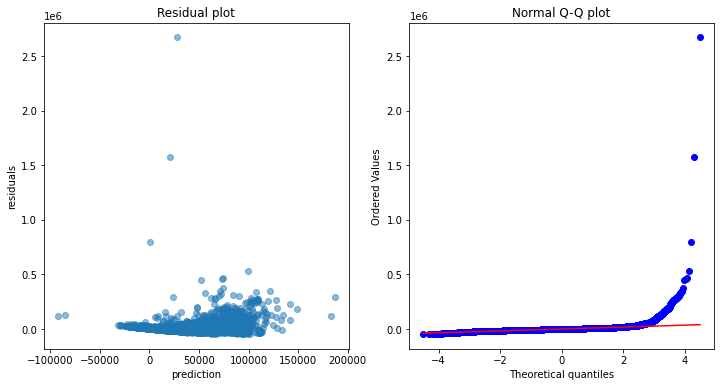

In [64]:
X=df_impute.drop(columns='price',axis=1)
y=df_impute.price
diagnostic_plot(X,y,fit3)

In [39]:
df_impute.sort_values(by='price').tail(10)[['price','make_name','model_name','year']]

,price,make_name,model_name,year
vin,,,,
WP0AC2999VS375762,499000.0,Porsche,911,1997
WDDRK7JA0FA011381,499900.0,Mercedes-Benz,SLS-Class,2015
JTHHX8BH7C1000123,529000.0,Lexus,LFA,2012
SCA687S59KU104736,544500.0,Rolls-Royce,Phantom,2019
SCA687S53KU104750,579525.0,Rolls-Royce,Phantom,2019
2FAGP9DW3LH100113,626340.0,Ford,GT,2020
1N4AL21E87N452332,799900.0,Nissan,Altima,2007
SBM15ACA7KW800401,999900.0,McLaren,Senna,2019
2C4RDGEGXHR681294,1599500.0,Dodge,Grand Caravan,2017


### Step 6) Drop Anomalous Data

In [65]:
### Remove significant outliers : 

df_impute.sort_values(by='price').tail(10)[['price','make_name','model_name']]

,price,make_name,model_name
vin,,,
SCAFK4C05LU200593,450450.0,Rolls-Royce,Ghost
ZFF90HLA3L0251028,470000.0,Ferrari,488
ZFF90HLA0K0242740,479900.0,Ferrari,488
WP0AC2999VS375762,499000.0,Porsche,911
JTHHX8BH7C1000123,529000.0,Lexus,LFA
SCA687S59KU104736,544500.0,Rolls-Royce,Phantom
2FAGP9DW3LH100113,626340.0,Ford,GT
1N4AL21E87N452332,799900.0,Nissan,Altima
2C4RDGEGXHR681294,1599500.0,Dodge,Grand Caravan


In [66]:
df_impute=df_impute[df_impute.price<625000]

In [68]:
# Dropping anomalous .. 
lm4 = smf.ols('price~city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+highway_fuel_economy+horsepower+is_new+latitude+longitude+mileage+owner_count+savings_amount+seller_rating', data=df_impute)

# Fit the model
fit4 = lm4.fit()

# Print summary statistics of the model's performance
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                 3.082e+04
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        07:36:21   Log-Likelihood:            -2.2081e+06
No. Observations:              207241   AIC:                         4.416e+06
Df Residuals:                  207227   BIC:                         4.416e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -8617.9852    396.317    -21.745      0.000   -9394.758   -7841.213
franchise_dealer[T.True]  1494.2867     69.659     21.451      0.000    1357.757    1630.816
is_new[T.True]            7499.8227     74.665    100.447      0.000    7353.482    7646.164
city_fuel_economy          564.2959      8.865     63.653      0.000     546.920     581.671
daysonmarket                 2.8416      0.217     13.105      0.000       2.417       3.267
engine_displacement         -3.4727      0.035    -98.600      0.000      -3.542      -3.404
highway_fuel_economy      -520.9989      9.401    -55.418      0.000    -539.425    -502.573
horsepower                 160.4512      0.507    316.227      0.000     159.457     161.446
latitude                    23.8023      4.649      5.119      0.000      14.690      32.915
longitude                  -15.6982      1.656     -9.479      0.000     -18.944     -12.452
mileage                     -0.1169      0.001   -140.531      0.000      -0.119      -0.115
owner_count               -307.1553     41.311     -7.435      0.000    -388.123    -226.187
savings_amount               1.7335      0.027     64.641      0.000       1.681       1.786
seller_rating             1561.0157     44.418     35.144      0.000    1473.957    1648.074
==============================================================================
Omnibus:                   296346.524   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        343032353.246
Skew:                           8.061   Prob(JB):                         0.00
Kurtosis:                     201.660   Cond. No.                     9.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

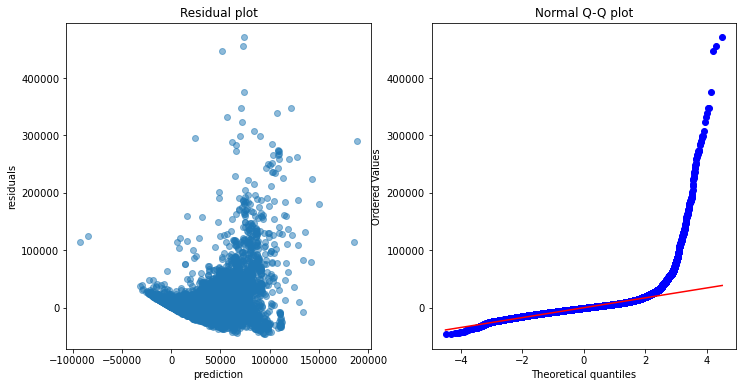

In [69]:
y=df_impute.price
X=df_impute.drop(columns=['price'],axis=1)
diagnostic_plot(X,y,fit4);

### Step 7) Try a Log Transformation

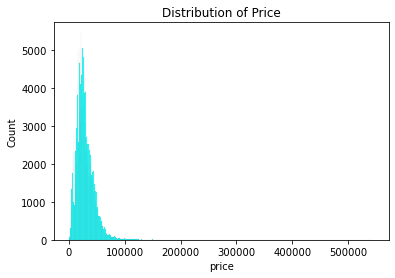

In [70]:
sns.histplot(df_impute['price'],color='cyan',alpha=.8);
plt.title('Distribution of Price');

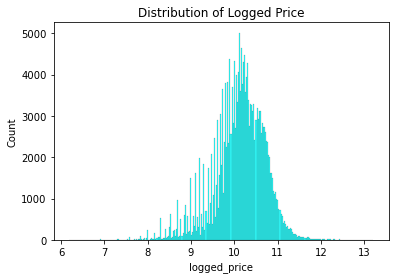

In [71]:
# Try log transform of response variable : 
df_impute['logged_price']=np.log(df_impute.price)
sns.histplot(df_impute['logged_price'],color='cyan',alpha=.8);
plt.title('Distribution of Logged Price');

In [72]:
## try using log Transformed version of Price 
lm5 = smf.ols('logged_price~city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+highway_fuel_economy+horsepower+is_new+latitude+longitude+mileage+owner_count+savings_amount+seller_rating', data=df_impute)

# Fit the model
fit5 = lm5.fit()

# Print summary statistics of the model's performance
fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           logged_price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                 7.815e+04
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        07:36:52   Log-Likelihood:                 1114.5
No. Observations:              207241   AIC:                            -2201.
Df Residuals:                  207227   BIC:                            -2058.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    9.3589      0.009   1006.318      0.000       9.341       9.377
franchise_dealer[T.True]     0.1018      0.002     62.297      0.000       0.099       0.105
is_new[T.True]               0.1552      0.002     88.598      0.000       0.152       0.159
city_fuel_economy            0.0206      0.000     99.164      0.000       0.020       0.021
daysonmarket             -6.991e-05   5.09e-06    -13.739      0.000   -7.99e-05   -5.99e-05
engine_displacement      -6.557e-05   8.26e-07    -79.331      0.000   -6.72e-05   -6.39e-05
highway_fuel_economy        -0.0229      0.000   -103.837      0.000      -0.023      -0.022
horsepower                   0.0042   1.19e-05    349.845      0.000       0.004       0.004
latitude                     0.0013      0.000     11.914      0.000       0.001       0.002
longitude                   -0.0006   3.89e-05    -16.000      0.000      -0.001      -0.001
mileage                  -7.218e-06   1.95e-08   -369.855      0.000   -7.26e-06   -7.18e-06
owner_count                 -0.0713      0.001    -73.564      0.000      -0.073      -0.069
savings_amount            3.942e-05   6.29e-07     62.646      0.000    3.82e-05    4.07e-05
seller_rating                0.0428      0.001     41.081      0.000       0.041       0.045
==============================================================================
Omnibus:                    41420.274   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1343334.431
Skew:                           0.167   Prob(JB):                         0.00
Kurtosis:                      15.468   Cond. No.                     9.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

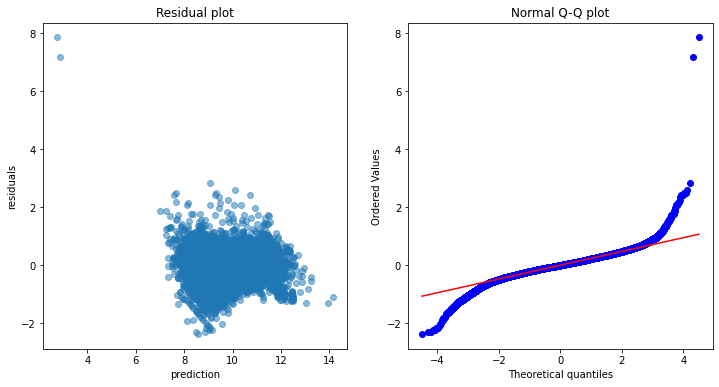

In [73]:
## Let's keep our eye on these 

y=df_impute.logged_price
X=df_impute.drop(columns=['price','logged_price'],axis=1)
diagnostic_plot(X,y,fit5)

In [79]:
# interesting!  both have super high mileage , ..  Let's leave these for now, but hold this thought
res=fit5.resid
df_impute.iloc[np.where(res>6)]

,price,savings_amount,seller_rating,year,city_fuel_economy,daysonmarket,engine_displacement,franchise_dealer,highway_fuel_economy,horsepower,is_new,latitude,longitude,mileage,owner_count,model_name,make_name,engine_type,dealer_zip,logged_price
vin,,,,,,,,,,,,,,,,,,,,
KMHH35LE6LU131604,22907.0,0,3.500000,2020,25.0,114,2000.0,True,32.0,161.0,True,35.2449,-114.038,999999.0,1.53337,Elantra GT,Hyundai,I4,86409,10.039198
1GCRYDED8LZ312540,39523.0,0,3.818182,2020,16.0,63,5300.0,True,22.0,355.0,True,43.6195,-116.334,1111111.0,1.53337,Silverado 1500,Chevrolet,V8,83713,10.584638


### #7   Final Check  :Linear Regression Assumptions  




In [51]:
# OPEN  : Bring this down, 

### Step #7   Bring in Categorical variables & Feature Engineering

In [81]:
## Let's start off by only using numerical vals 
cat_cols=df.dtypes[df.dtypes=='object'].index
df_cat=df[cat_cols]

for i in df_cat.columns:
    print(i)

dealer_zip
engine_cylinders
engine_type
franchise_make
fuel_type
has_accidents
is_oemcpo
length
listed_date
make_name
maximum_seating
model_name
power
salvage
torque
transmission
wheel_system
wheel_system_display
wheelbase
width


#### Some Basic Feature Engineering

In [53]:
### Let's create torque feature that makes more sense for our model .. 
df_cat.torque.value_counts().head()

383 lb-ft @ 4,100 RPM    8880
400 lb-ft @ 4,500 RPM    6672
410 lb-ft @ 3,950 RPM    5627
148 lb-ft @ 200 RPM      5399
132 lb-ft @ 4,500 RPM    5277
Name: torque, dtype: int64

In [82]:
def normalize_torque(x):
    try:
        lb_ft=int(x.split()[0])
        rpm=int(x.split()[3].replace(',',''))
        return lb_ft/rpm
    except:
        return np.nan   

In [83]:
df_impute=df_impute.join(df['torque'])

In [84]:
df_impute['torque_norm']=df_impute['torque'].apply(normalize_torque)
df_impute['torque_norm']=df_impute['torque_norm'].fillna(df_impute['torque_norm'].median())

In [85]:
df_comb=df_impute.join(df[['maximum_seating']])

In [86]:
df_comb.maximum_seating.value_counts(dropna=False)

5 seats     135955
7 seats      22296
6 seats      17618
8 seats      14863
NaN           6047
4 seats       5936
2 seats       2464
3 seats       1373
15 seats       332
9 seats        243
10 seats        42
--              39
12 seats        33
Name: maximum_seating, dtype: int64

In [87]:
df_comb.maximum_seating=df_comb.maximum_seating.replace('--',None)
df_comb.maximum_seating=df_comb.maximum_seating.fillna('5 seats')

df_comb.maximum_seating=df_comb.maximum_seating.apply(lambda x: x.split()[0]).astype(int)

In [88]:
# testing engineered features
lm6 = smf.ols('logged_price~torque_norm+maximum_seating+city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+highway_fuel_economy+horsepower+is_new+latitude+longitude+mileage+owner_count+savings_amount+seller_rating', data=df_comb)

# Fit the model
fit6 = lm6.fit()

# Print summary statistics of the model's performance
fit6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           logged_price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                 6.828e+04
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        07:42:45   Log-Likelihood:                 1815.1
No. Observations:              207241   AIC:                            -3598.
Df Residuals:                  207225   BIC:                            -3434.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    9.2389      0.010    941.144      0.000       9.220       9.258
franchise_dealer[T.True]     0.1000      0.002     61.337      0.000       0.097       0.103
is_new[T.True]               0.1540      0.002     88.156      0.000       0.151       0.157
torque_norm                  0.1007      0.005     19.301      0.000       0.090       0.111
maximum_seating              0.0165      0.001     32.772      0.000       0.015       0.017
city_fuel_economy            0.0202      0.000     97.177      0.000       0.020       0.021
daysonmarket             -7.121e-05   5.08e-06    -14.032      0.000   -8.12e-05   -6.13e-05
engine_displacement      -6.587e-05   8.47e-07    -77.807      0.000   -6.75e-05   -6.42e-05
highway_fuel_economy        -0.0216      0.000    -96.914      0.000      -0.022      -0.021
horsepower                   0.0041    1.2e-05    345.778      0.000       0.004       0.004
latitude                     0.0013      0.000     12.296      0.000       0.001       0.002
longitude                   -0.0006   3.87e-05    -15.694      0.000      -0.001      -0.001
mileage                  -7.233e-06   1.95e-08   -371.239      0.000   -7.27e-06    -7.2e-06
owner_count                 -0.0685      0.001    -70.615      0.000      -0.070      -0.067
savings_amount            4.019e-05   6.28e-07     63.991      0.000     3.9e-05    4.14e-05
seller_rating                0.0426      0.001     40.998      0.000       0.041       0.045
==============================================================================
Omnibus:                    42389.105   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1417301.737
Skew:                           0.201   Prob(JB):                         0.00
Kurtosis:                      15.805   Cond. No.                     9.92e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Create Dummy Variables

In [61]:
sorted(df_comb['make_name'].unique())[:5]

['Acura', 'Alfa Romeo', 'Aston Martin', 'Audi', 'BMW']

In [ ]:
### Note: the dummy variable trap

In [62]:
df_make_dummies=pd.get_dummies(df_comb.make_name,drop_first=True)
df_make_dummies.head()

,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Buick,Cadillac,Chevrolet,Chrysler,Dodge,FIAT,Ferrari,Fisker,Ford,GMC,Genesis,Honda,Hummer,Hyundai,INFINITI,Isuzu,Jaguar,Jeep,Karma,Kia,Lamborghini,Land Rover,Lexus,Lincoln,Lotus,MINI,Maserati,Maybach,Mazda,McLaren,Mercedes-Benz,Mercury,Mitsubishi,Nissan,Oldsmobile,Plymouth,Pontiac,Porsche,RAM,Rolls-Royce,SRT,Saab,Saturn,Scion,Subaru,Suzuki,Toyota,Volkswagen,Volvo,smart
vin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
WBA7H6C35HG614462,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ZACCJABBXHPF27967,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5TDJZRFH6KS569799,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
KNDPM3AC4M7844763,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1FMCU9J91EUA46841,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [89]:
# Testing with Dummy Make variable!  -- > .867
lm7 = smf.ols('logged_price~make_name+maximum_seating+torque_norm+city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+highway_fuel_economy+horsepower+is_new+latitude+longitude+mileage+owner_count+savings_amount+seller_rating', data=df_comb)

# Fit the model
fit7 = lm7.fit()

# Print summary statistics of the model's performance
fit7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           logged_price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                 1.953e+04
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        07:43:22   Log-Likelihood:                 26007.
No. Observations:              207241   AIC:                        -5.187e+04
Df Residuals:                  207171   BIC:                        -5.116e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      9.4693      0.010    931.550      0.000       9.449       9.489
make_name[T.Alfa Romeo]       -0.0183      0.013     -1.458      0.145      -0.043       0.006
make_name[T.Aston Martin]      0.6087      0.030     20.589      0.000       0.551       0.667
make_name[T.Audi]              0.1317      0.006     21.082      0.000       0.119       0.144
make_name[T.BMW]               0.0880      0.006     15.235      0.000       0.077       0.099
make_name[T.Bentley]           0.2722      0.027     10.033      0.000       0.219       0.325
make_name[T.Buick]            -0.1514      0.006    -26.992      0.000      -0.162      -0.140
make_name[T.Cadillac]          0.0320      0.006      5.463      0.000       0.021       0.043
make_name[T.Chevrolet]        -0.1789      0.005    -37.474      0.000      -0.188      -0.170
make_name[T.Chrysler]         -0.2517      0.006    -40.387      0.000      -0.264      -0.239
make_name[T.Dodge]            -0.3390      0.005    -64.185      0.000      -0.349      -0.329
make_name[T.FIAT]             -0.2247      0.017    -13.592      0.000      -0.257      -0.192
make_name[T.Ferrari]           0.5250      0.029     18.291      0.000       0.469       0.581
make_name[T.Fisker]           -0.2088      0.123     -1.692      0.091      -0.451       0.033
make_name[T.Ford]             -0.2161      0.005    -45.858      0.000      -0.225      -0.207
make_name[T.GMC]              -0.1165      0.005    -22.034      0.000      -0.127      -0.106
make_name[T.Genesis]           0.0008      0.014      0.058      0.954      -0.026       0.028
make_name[T.Honda]            -0.0921      0.005    -18.843      0.000      -0.102      -0.082
make_name[T.Hummer]            0.1749      0.048      3.645      0.000       0.081       0.269
make_name[T.Hyundai]          -0.1491      0.005    -29.309      0.000      -0.159      -0.139
make_name[T.INFINITI]         -0.0685      0.006    -10.547      0.000      -0.081      -0.056
make_name[T.Isuzu]            -0.7006      0.071     -9.821      0.000      -0.840      -0.561
make_name[T.Jaguar]            0.0951      0.010      9.470      0.000       0.075       0.115
make_name[T.Jeep]             -0.0655      0.005    -13.168      0.000      -0.075      -0.056
make_name[T.Kia]              -0.2306      0.005    -44.468      0.000      -0.241      -0.220
make_name[T.Lamborghini]       0.6513      0.046     14.114      0.000       0.561       0.742
make_name[T.Land Rover]        0.1887      0.008     23.632      0.000       0.173       0.204
make_name[T.Lexus]             0.0960      0.006     16.022      0.000       0.084       0.108
make_name[T.Lincoln]          -0.0512      0.006     -8.092      0.000      -0.064      -0.039
make_name[T.Lotus]             0.6065      

### Exercise 
Using your domain knowledge of cars, pick the most valuable categorical features to add to the model. Try as many as you think make sense. 

* Iteratively test the categorical features

*Challenge* : create a function to iteratively test the addition of a new categorical variables. 

In [64]:
cats_to_test=['model_name','engine_type','dealer_zip','transmission','wheel_system','fuel_type','has_accidents']

In [91]:
cols_to_join=['transmission','wheel_system','fuel_type','has_accidents']
df_comb=df_comb.join(df[cols_to_join])

In [92]:
# A quick clean of zips . .
common_zips=df_comb.dealer_zip.value_counts().index[df_comb.dealer_zip.value_counts()>100]
df_comb['zips_clean']=df_comb.dealer_zip.apply(lambda x:x if x in common_zips else 'Other')

In [67]:
def categorical_n_check(string,column,df):
    model = smf.ols(string, data=df)
    fit = model.fit()
    print(column)
    print(fit.rsquared)
    print(fit.rsquared_adj)
    print('\n')
    return df_comb,fit.rsquared

In [93]:
# before we run zips .. 
df_comb.zips_clean=df_comb.zips_clean.astype('str')

In [ ]:
# Warning ( this may take some time to run  )
string='logged_price~make_name+maximum_seating+torque_norm+city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+highway_fuel_economy+horsepower+is_new+latitude+longitude+mileage+owner_count+savings_amount+seller_rating'
for col in cats_to_test:
    string+='+' + col
    categorical_n_check(string,col,df_comb)

# Regression with sklearn
Statsmodels has decent functionality for linear models, and is great for statistical summaries. But, scikit-learn has more modeling options for all sorts of algorithms as well as data preparation and is growing every day, so we will generally be working with that from here on.

### Regression with sklearn
Before we jump into some of the additional features of sklearn, let's try to repeat what we have so far using sklearn's built in **LinearRegression**.

1st we will have to use some functions to add our categorical dummy variables

In [94]:
df_dummies= pd.get_dummies(df_comb[['transmission','model_name','make_name','engine_type','zips_clean','wheel_system','fuel_type','has_accidents']],drop_first=True)

### combine with the previous
df_cat_num=df_comb.drop(['torque','dealer_zip','transmission','model_name','make_name','engine_type','zips_clean','wheel_system','fuel_type','has_accidents'],1).join(df_dummies)

/var/folders/jn/625fnnbs1jg77y82ld96q65w0000gn/T/ipykernel_2249/3202041944.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_cat_num=df_comb.drop(['torque','dealer_zip','transmission','model_name','make_name','engine_type','zips_clean','wheel_system','fuel_type','has_accidents'],1).join(df_dummies)


In [95]:
df_cat_num.head()

,price,savings_amount,seller_rating,year,city_fuel_economy,daysonmarket,engine_displacement,franchise_dealer,highway_fuel_economy,horsepower,is_new,latitude,longitude,mileage,owner_count,logged_price,torque_norm,maximum_seating,transmission_CVT,transmission_Dual Clutch,transmission_M,model_name_124 Spider,model_name_1500,model_name_2 Series,model_name_200,model_name_3 Series,model_name_3 Series Gran Turismo,model_name_300,model_name_300-Class,model_name_3000GT,model_name_300M,model_name_300ZX,model_name_350-Class,model_name_350Z,model_name_360 Spider,model_name_370Z,model_name_380-Class,model_name_4 Series,model_name_420-Class,model_name_458 Italia,model_name_488,model_name_4Runner,model_name_5 Series,model_name_5 Series Gran Turismo,model_name_500,model_name_500-Class,model_name_500L,model_name_500X,model_name_550,model_name_560-Class,model_name_57,model_name_570S,model_name_599 GTB Fiorano,model_name_6 Series,model_name_6 Series Gran Turismo,model_name_612 Scaglietti,model_name_650S,model_name_7 Series,model_name_718 Boxster,model_name_718 Cayman,model_name_720S,model_name_8 Series,model_name_812 Superfast,model_name_850,model_name_86,model_name_9-2X,model_name_9-3,model_name_9-3 SportCombi,model_name_9-5,model_name_9-5 SportCombi,model_name_9-7X,model_name_911,model_name_968,model_name_A-Class,model_name_A3,model_name_A3 Sportback,model_name_A4,model_name_A4 Allroad,model_name_A4 Avant,model_name_A5,model_name_A5 Sportback,model_name_A6,model_name_A6 Allroad,model_name_A7,model_name_A8,model_name_A8 Hybrid Plug-In,model_name_AMG GT,model_name_ATS,model_name_ATS Coupe,model_name_ATS-V,model_name_ATS-V Coupe,model_name_Acadia,model_name_Accent,model_name_Accord,model_name_Accord Coupe,model_name_Accord Crosstour,model_name_Accord Hybrid,model_name_Aerio,model_name_Alero,model_name_Allroad,model_name_Altima,model_name_Altima Coupe,model_name_Altima Hybrid,model_name_Amanti,model_name_Armada,model_name_Arnage,model_name_Arteon,model_name_Ascender,model_name_Ascent,model_name_Aspen,model_name_Astra,model_name_Astro,model_name_Atlas,model_name_Atlas Cross Sport,model_name_Aura,model_name_Aurora,model_name_Avalanche,model_name_Avalon,model_name_Avalon Hybrid,model_name_Avenger,model_name_Aventador,model_name_Aveo,model_name_Aviator,model_name_Azera,model_name_Aztek,model_name_Azure,model_name_B9 Tribeca,model_name_BRZ,model_name_Baja,model_name_Beetle,model_name_Bentayga,model_name_Blackwood,model_name_Blazer,model_name_Bonneville,model_name_Borrego,model_name_Boxster,model_name_Bravada,model_name_Brougham,model_name_C-Class,model_name_C-HR,model_name_C-Max Energi,model_name_C-Max Hybrid,model_name_C/K 1500,model_name_C/V,model_name_C30,model_name_C70,model_name_CC,model_name_CL-Class,model_name_CLA-Class,model_name_CLK-Class,model_name_CLS-Class,model_name_CR-V,model_name_CR-V Hybrid,model_name_CR-Z,model_name_CT Hybrid,model_name_CT4,model_name_CT5,model_name_CT6,model_name_CTS,model_name_CTS Coupe,model_name_CTS Sport Wagon,model_name_CTS-V,model_name_CTS-V Coupe,model_name_CTS-V Wagon,model_name_CX-3,model_name_CX-30,model_name_CX-5,model_name_CX-7,model_name_CX-9,model_name_Cabrio,model_name_Cadenza,model_name_Caliber,model_name_California,model_name_California T,model_name_Camaro,model_name_Camry,model_name_Camry Hybrid,model_name_Camry Solara,model_name_Canyon,model_name_Captiva Sport,model_name_Caravan,model_name_Cascada,model_name_Cavalier,model_name_Cayenne,model_name_Cayenne E-Hybrid,model_name_Cayman,model_name_Celica,model_name_Century,model_name_Challenger,model_name_Charger,model_name_Cherokee,model_name_Cirrus,model_name_City Express,model_name_Civic,model_name_Civic Coupe,model_name_Civic Hatchback,model_name_Civic Hybrid,model_name_Civic Type R,model_name_Clarity Hybrid Plug-In,model_name_Classic,model_name_Cobalt,model_name_Colorado,model_name_Comanche,model_name_Commander,model_name_Compass,model_name_Continental,model_name_Continental Flying Spur,model_name_Continental GT,model_name_Continental GTC,model_name_

In [96]:
from sklearn.model_selection import train_test_split

X=df_cat_num.drop(columns=['price','logged_price'],axis=1)
y=df_cat_num.logged_price


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)
# Partition remaining data into train/validation for 60, 20, 20 divide
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 1234)


### Big Machine Learning Idea #1 :  Cross Validation 

The more complex a model is, the more likely it is to overfit, because it learned too much detail in training. This complexity can mean that there are a lot of features, multicollinear features, that we’re using polynomial terms when we don’t need to, etc. One way to correct for overfitting is to adjust for these concerns. Strategies for algorithms other than linear regression might be somewhat different, but they will always aim to reduce complexity.

In [98]:
### Cross Validation


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                       test_size=.2,     
                                       random_state=42)
lm = LinearRegression() 

kf = KFold(n_splits=5, # number of folds
     shuffle=True, # randomizes order of rows before split
     random_state = 42) # using same number in future code/ rerunning allows us to replicate the split 

#to see all validation scores
lm_cv = cross_val_score(lm, X_train, y_train, # estimator, features, target
     cv= kf, # folds created above; could also just use a number 
     scoring='r2') # scoring metric
print(lm_cv)

# to print the mean score with standard deviation, rounded to 2 decimals
print(np.round(np.mean(lm_cv), 2), "+-", np.round(np.std(lm_cv),2))

[-1.45823612e+07 -1.40726245e+08 -3.17877500e+06 -2.52990764e+07
 -2.71133598e+07]
-42179963.45 +- 50012112.15


In [99]:
def build_grid_search_est(model, X, y, cv=5, **params):

    grid_est = GridSearchCV(model, param_grid=params, cv=kfold, 
                            return_train_score=False)
    grid_est.fit(X, y)
    df = pd.DataFrame(grid_est.cv_results_)
    for param in params:
        df[param] = df.params.apply(lambda val: val[param])
#       plt.plot(np.log(df.alpha), df.mean_test_score);
        plt.semilogx(df.alpha, df.mean_test_score)
    return grid_est

In [ ]:
alphas = 10**np.linspace(-2,2,200)
ridge_model = RidgeCV(alphas = alphas, cv=5)
ridge_model.fit(X_tr, y_train)
ridge_model.score(X_tr, y_train)
r_squared_test = ridge_model.score(X_te, y_test)
list(zip(X_train.columns, lr_model_ridge.coef_))
alpha = ridge_model.alpha_

In [97]:
# Create an empty model
# warning!  may take awhile to run. .  7:48
# sklearn : automatially fits intercept

# Fit the model to the full dataset
lr = LinearRegression(n_jobs=-1)
lr.fit(X_train, y_train)

# Print out the R^2 for the model for the train data
print('Train R^2: {:6.3f}'.format(lr.score(X_train,y_train)))

# Print out the R^2 for the model for test data
print('Val R^2: {:6.3f}'.format(lr.score(X_val,y_val)))

Train R^2:  0.932
Val R^2: -15396358.866


In [ ]:
#whoa! 
# Let's back up a sec, .. 

In [75]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [ ]:
# # Warning : might take awhile to run . .
alpha_list=np.logspace(-4,2,7)

score_list=[]

for a in alpha_list:
    cv = KFold(n_splits=3)  # cv=3 makes a KFold inner splitting with 3 folds
    lasso = Lasso(alpha=a)  

    pipe = Pipeline([
        ('scale', StandardScaler()),
        ('clf', lasso)])

    scores = cross_val_score(pipe, X_train, y_train, cv=cv,n_jobs=-1,scoring='r2')
    print(scores)
    score_list.append(scores)

In [84]:
from sklearn.pipeline import Pipeline

In [85]:
alphas = np.logspace(-4,4,20)
for a in alphas:
    cv = KFold(n_splits=3,random_state=123,shuffle=True)  # cv=3 makes a KFold inner splitting with 3 folds
    lasso = Lasso(alpha=a)  
    pipe = Pipeline([
        ('scale', StandardScaler()),
        ('clf', lasso)])
    scores = cross_val_score(pipe, X_train, y_train, cv=cv,n_jobs=-1)
    print(scores)
    score_list.append(scores)

KeyboardInterrupt: 

In [73]:
X=df_cat_num.drop(['price','logged_price'],1)
y=df_cat_num.logged_price


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)
# Partition remaining data into train/validation for 60, 20, 20 divide
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 1234)

/var/folders/jn/625fnnbs1jg77y82ld96q65w0000gn/T/ipykernel_1670/1020980401.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=df_cat_num.drop(['price','logged_price'],1)


In [77]:
from sklearn import linear_model

In [82]:
X_train.columns

Index(['savings_amount', 'seller_rating', 'year', 'city_fuel_economy',
       'daysonmarket', 'engine_displacement', 'franchise_dealer',
       'highway_fuel_economy', 'horsepower', 'is_new',
       ...
       'wheel_system_4X2', 'wheel_system_AWD', 'wheel_system_FWD',
       'wheel_system_RWD', 'fuel_type_Compressed Natural Gas',
       'fuel_type_Diesel', 'fuel_type_Flex Fuel Vehicle', 'fuel_type_Gasoline',
       'fuel_type_Hybrid', 'has_accidents_True'],
      dtype='object', length=1216)

In [80]:
alpha_list=np.logspace(-6,6,13)
alpha_list

train_scores=[]
val_scores=[]
for a in alpha_list:
    # update alpha value! 
    clf = linear_model.Lasso(alpha=a,normalize=True)
    clf.fit(X_train,y_train)
    train_scores.append(clf.score(X_train,y_train))
    print(clf.score(X_train,y_train))
    val_scores.append(clf.score(X_val,y_val))
    print(clf.score(X_val,y_val))

/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


0.9312308330894989
0.9299011600016899


/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


0.9123191111893109
0.9111471209862348


/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


0.8325518234935018
0.8320416977879841


/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


0.01341068925509814
0.01345906769554528


/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


0.0
-7.994783688403118e-07


/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


KeyboardInterrupt: 

In [81]:
alpha_list=np.logspace(-6,6,13)
alpha_list

train_scores=[]
val_scores=[]
for a in alpha_list:
    # update alpha value! 
    clf = linear_model.Ridge(alpha=a,normalize=True)
    clf.fit(X_train,y_train)
    train_scores.append(clf.score(X_train,y_train))
    print(clf.score(X_train,y_train))
    val_scores.append(clf.score(X_val,y_val))
    print(clf.score(X_val,y_val))

/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


0.9321550756367001
0.9306294376760913


/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


0.9321550387030292
0.9306313713146981


/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


0.932153828008677
0.9306399637739279


/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


KeyboardInterrupt: 

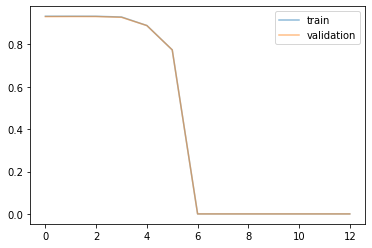

In [117]:
plt.plot(train_scores,alpha=.5,label='train')
plt.plot(val_scores,alpha=.5,label='validation')
plt.legend();

In [79]:
### Feature Interpretation

feat_df=pd.DataFrame({'coef':lr.coef_,'features':X.columns,'abs_val_coef':np.abs(lr.coef_)}).sort_values(by='abs_val_coef')
feat_df.tail(10)

,coef,features,abs_val_coef
51,1.858892,model_name_570S,1.858892
369,1.949879,model_name_GT,1.949879
60,1.979697,model_name_720S,1.979697
45,2.136350,model_name_500-Class,2.136350
439,2.171923,model_name_LFA,2.171923
523,2.417353,model_name_NSX,2.417353
302,2.438492,model_name_EuroVan,2.438492
396,2.555728,model_name_Grand Wagoneer,2.555728
853,2.565048,model_name_Z8,2.565048
7702,2.619997,dealer_zip_89139,2.619997


## sklearn: What's in a model?
Essentially all models in `sklearn` inherit from the same type of "estimator" interface.  This means they'll share common methods that we'll see over and over again like:
- `fit()`: Fit a model to a set of training data
- `score()`: Score the performance of a model on a given sample of data with known _ground truth_ dependent variables
- `predict()`: Predict target/response variables based on a sample of independent variables (features, predictors, etc)

Additionally, models are usually loaded with other goodies once they've been fit, which can provide information about the resulting fitted model.  For instance, the following might be of interest in regression:
- `intercept_`: our $\beta_0$ intercept in our regression model
- `coef_`: the other $\beta$s in our model



##### Pickling for Later
We're going to come back to this dataset!  So let's pickle it away for later...

`sklearn`, `pandas` and `statsmodels` have their own respective methods for "pickling" their objects.

**Pandas:**

To pickle a `pandas.DataFrame` use the [`to_pickle()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_pickle.html) method.  Use this now to pickle your training data `df` now.

In [77]:
# Pickle your pandas dataframe
df_cat_numb.to_pickle('data/df_cat_numb.pkl')

**Statsmodels**

To pickle a statsmodels object us the [`save()`](http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.OLSResults.save.html#statsmodels.regression.linear_model.OLSResults.save) method.  Use this to pickle your best fit model `fit2` to `survey_sm_model.pkl` now.

In [163]:
# Pickle fit8 to a file 
fit8.save('models/sm_model_8.pkl')

**sklearn**

Pickle an `sklearn` model to the file `survey_sk_model.pkl` using the `sklearn` replacement for pickle `joblib` as seen [here](http://scikit-learn.org/stable/modules/model_persistence.html).

In [78]:
import joblib
joblib.dump(lr, 'models/sklearn_model_1.pkl')

['models/sklearn_model_1.pkl']

### Polynomial Regression
So far we've only tried to create regression models that are linear functions of the predictor variables.  However, there's no reason we can't transform the predictor variables by any type of function we want before inputting them to linear regression.  This is the idea behind [**Polynomial Regression**](https://en.wikipedia.org/wiki/Polynomial_regression) and it allows us (along with similar functional regressions) to essentially model our response variables as any function of our predictor variables that we like.  Viewed in this way, Linear Regression is just a special instance of Polynomial Regression with a polynomial of degree 1.

## Polynomial Regression with sklearn
sklearn has built-in options for converting your predictor variables to polynomial functions of them.  In this exercise we'll use the [**PolynomialFeatures**](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) class of sklearn to manipulate incoming predictors into nth-order polynomials of those features.  We'll combine this with the [***make_pipeline***](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) function to string together a pipeline of operations that is able to first transform our linear features into polynomial features and then run a linear regression against the resulting polynomial features. 

### Generating Random Data
The first thing we're going to do is manufacture some data from a known distribution with a little additive noise.  This allows us to compare our results to the known ground truth.  Let's create that data from a sine curve as follows:

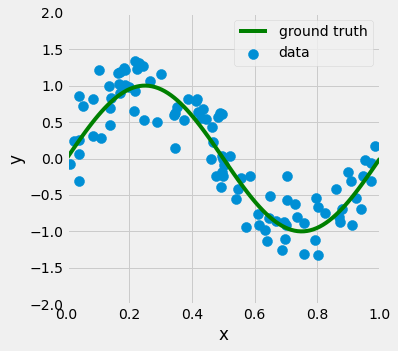

In [165]:
from IPython.core.pylabtools import figsize
figsize(5,5)
plt.style.use('fivethirtyeight')

# We start by seeding the random number generator so that everyone will have the same "random" results
np.random.seed(9)

# Function that returns the sin(2*pi*x)
def f(x):
    return np.sin(2 * np.pi * x)

# generate points used to plot
# This returns 100 evenly spaced numbers from 0 to 1
x_plot = np.linspace(0, 1, 100)

# generate points and keep a subset of them
n_samples = 100
# Generate the x values from the random uniform distribution between 0 and 1
X = np.random.uniform(0, 1, size=n_samples)[:, np.newaxis]
# Generate the y values by taking the sin and adding a random Gaussian (normal) noise term
y = f(X) + np.random.normal(scale=0.3, size=n_samples)[:, np.newaxis]

# Plot the training data against what we know to be the ground truth sin function
fig,ax = plt.subplots(1,1);
ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
ax.scatter(X, y, label='data', s=100)
ax.set_ylim((-2, 2))
ax.set_xlim((0, 1))
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.legend();

## Fitting an nth-degree Polynomial
Now that we have our data and know the ground truth, let's try fitting a 3rd degree polynomial to our training data and see how it looks.  3rd degree makes sense for this interval because the sin function has 2 turning points over the interval [0,1] and a 3rd degree polynomial will general have 2 (or less) turning points.

We first define a function `plot_approximation` that takes a pipeline of steps from make_pipeline and some plotting info and will plot the results of the sklearn pipeline on the specified plot with the ground truth and data in the background.

In [59]:
# import PolynomialFeatures and make_pipeline for Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Plot the results of a pipeline against ground truth and actual data
def plot_approximation(est, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
    ax.scatter(X, y, s=100)
    ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right',frameon=True)

Now let's generate our pipeline for a 3rd degree polynomial and try it out in our plotting function.  Note that the steps are:
- Use PolynomialFeatures(3) to create a generator of 3rd degree polynomials
- Feed this generator to make_pipeline along with a LinearRegression object to tell it to string together these operations when given a new set of input predictor variables.  This results in a new model object that has the same `fit()`, `score()`, `predict()`, etc functions
- Call `fit()` on our new object to fit a 3rd degree polynomial regression
- Send the result to our plotting function to view the results

In [ ]:
# Set up the plot
fig,ax = plt.subplots(1,1)
# Set the degree of our polynomial
degree = 3

# Generate the model type with make_pipeline
# This tells it the first step is to generate 3rd degree polynomial features in the input features and then run
# a linear regression on the resulting features
est = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit our model to the training data
est.fit(X, y)
# Plot the results
plot_approximation(est, ax, label='degree=%d' % degree)

> How would you characterize this fit?

Plot the fit of a polynomial of degree 2:

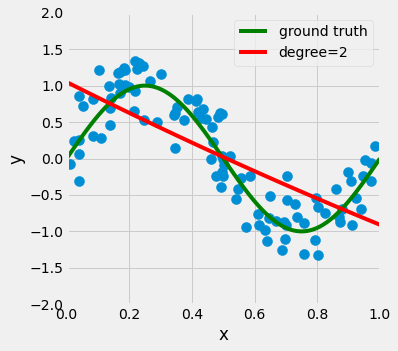

In [168]:
# Set up the plot
fig,ax = plt.subplots(1,1)
# Set the degree of our polynomial
degree = 2
# Generate the model type with make_pipeline
# This tells it the first step is to generate 3rd degree polynomial features in the input features and then run
# a linear regression on the resulting features
est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
# Fit our model to the training data
est.fit(X, y)
# Plot the results
plot_approximation(est, ax, label='degree=%d' % degree)

Plot the fit of a polynomial of degree 9, or heck, how bout 27!?:

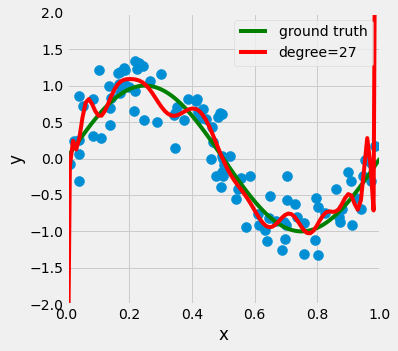

In [169]:
# Set up the plot
fig,ax = plt.subplots(1,1)
# Set the degree of our polynomial
degree = 27
# Generate the model type with make_pipeline
# This tells it the first step is to generate 3rd degree polynomial features in the input features and then run
# a linear regression on the resulting features
est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
# Fit our model to the training data
est.fit(X, y)
# Plot the results
plot_approximation(est, ax, label='degree=%d' % degree)

> What happens as we increase the degree of polynomial?

> Which polynomial should we choose?

To gain some insight into this, let's plot polynomials from degree 1 to 9 and examine how the errors in our predictions change vs. the training and test sets.

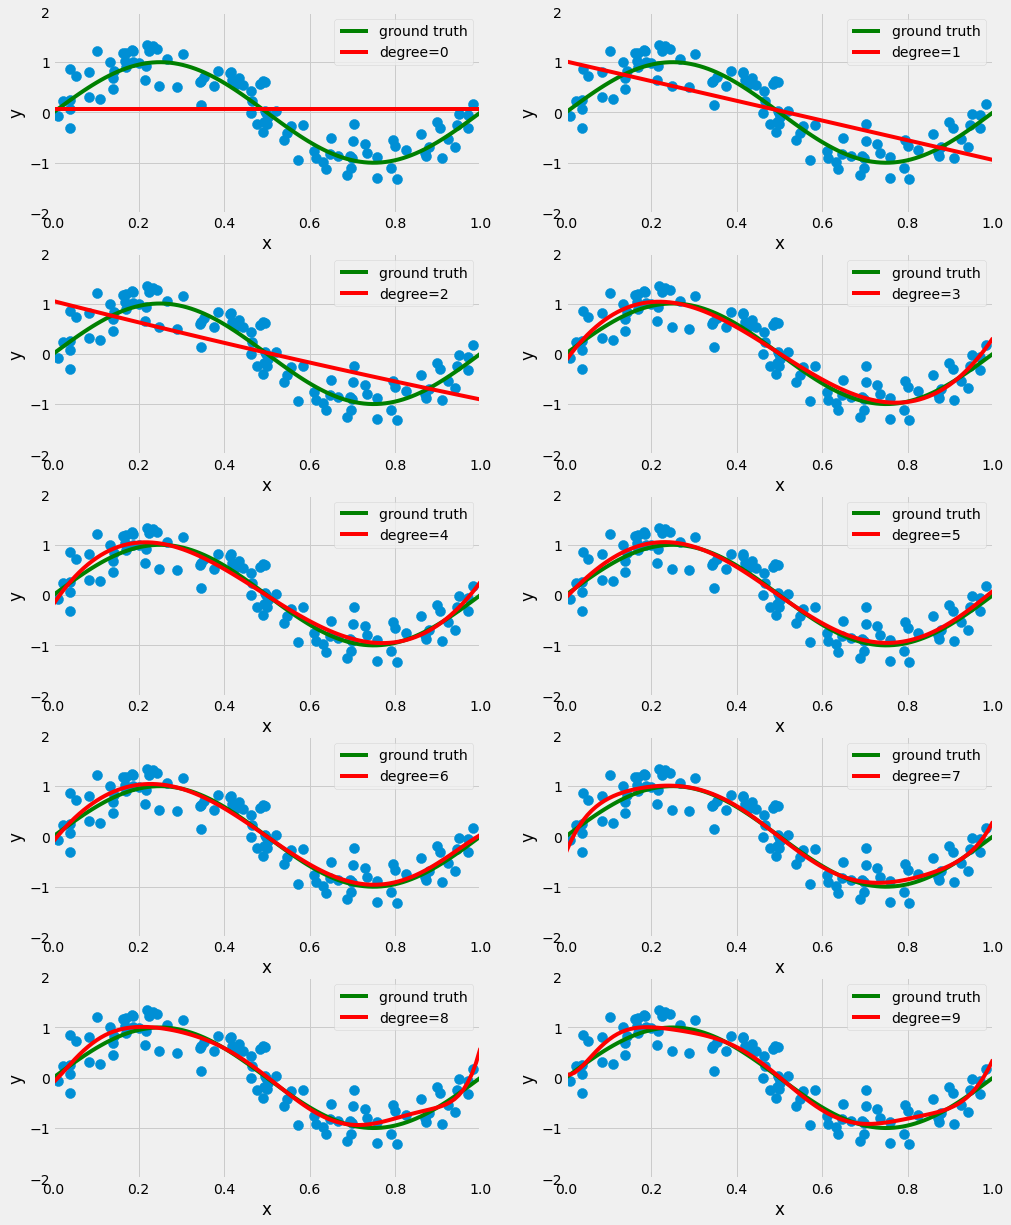

In [170]:
# Step through degrees from 0 to 9 and store the training and test (generalization) error.
# This sets up 5 rows of 2 plots each (KEEP)
fig, ax_rows = plt.subplots(5, 2, figsize=(15, 20))
for degree in range(10):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X, y)
    # This sets the appropriate axis for each degree (KEEP)
    ax_row_left, ax_row_right = ax_rows[degree//2]
    if degree%2 == 0:
        ax = ax_row_left
    else:
        ax = ax_row_right
    plot_approximation(est, ax, label='degree=%d' % degree)

> What do you notice?

### Pickling for later
We may return to this fake data for further exploration later, so let's pickle our `X` and `y` so we can do just that.  To save `numpy` arrays, you use the [`numpy.save()`](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.save.html) method.  We can save multiple arrays to one file with the [`numpy.savez()`](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.savez.html) method.  Use this now to save `X` and `y` to the file `poly_data.npz`.

In [78]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# polyNomial=PolynomialFeatures(interaction_only=True,include_bias=False)
# X_poly=polyNomial.fit_transform(X)
# # Fit our model to the training data

# X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 10)
# # Partition remaining data into train/validation for 60, 20, 20 divide
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 3)

# lr.fit(X_train, y_train)

In [ ]:
# # Print out the R^2 for the model against the full dataset
# print('Train R^2: {:6.3f}'.format(lr.score(X_train,y_train)))

# # Print out the R^2 for the model against the full dataset
# print('Val R^2: {:6.3f}'.format(lr.score(X_val,y_val)))

In [ ]:
# feat_df=pd.DataFrame({'coef':lr.coef_,'features':X.columns,'abs_val_coef':np.abs(lr.coef_)}).sort_values(by='abs_val_coef')
# feat_df.tail(10)

### Big Machine Learning Idea #2  : Bias Variance Trade-off 

In [81]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
clf = linear_model.Lasso()

# Standardize features

std=StandardScaler()

X_train_std=std.fit_transform(X_train)
X_val_std=std.transform(X_val)

In [82]:
pd.DataFrame(X_train_std).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,8075,8076,8077,8078,8079,8080,8081,8082,8083,8084,8085,8086,8087,8088,8089,8090,8091,8092,8093,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103,8104,8105,8106,8107,8108,8109,8110,8111,8112,8113,8114,8115,8116,8117,8118,8119,8120,8121,8122,8123,8124,8125,8126,8127,8128,8129,8130,8131,8132,8133,8134,8135,8136,8137,8138,8139,8140,8141,8142,8143,8144,8145,8146,8147,8148,8149,8150,8151,8152,8153,8154,8155,8156,8157,8158,8159,8160,8161,8162,8163,8164,8165,8166,8167,8168,8169,8170,8171,8172,8173,8174,8175,8176,8177,8178,8179,8180,8181,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191,8192,8193,8194,8195,8196,8197,8198,8199,8200,8201,8202,8203,8204,8205,8206,8207,8208,8209,8210,8211,8212,8213,8214,8215,8216,8217,8218,8219,8220,8221,8222,8223,8224,8225,8226,8227,8228,8229,8230,8231,8232,8233,8234,8235,8236,8237,8238,8239,8240,8241,8242,8243,8244,8245,8246,8247,8248,8249,8250,8251,8252,8253,8254,8255,8256,8257,8258,8259,8260,8261,8262,8263,8264,8265,8266,8267,8268,8269,8270,8271,8272,8273,8274,8275,8276,8277,8278,8279,8280,8281,8282,8283,8284,8285,8286,8287,8288,8289,8290,8291,8292,8293,8294,8295,8296,8297,8298,8299,8300,8301,8302,8303,8304,8305,8306,8307,8308,8309,8310,8311,8312,8313,8314,8315,8316,8317,8318,8319,8320,8321,8322,8323,8324
count,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,165921.0,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,165921.0,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,165921.0,1.659210e+05,1.659210e+05,1.659210e+05,165921.0,165921.0,1.659210e+05,165921.0,1.659210e+05,1.659210e+05,165921.0,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,165921.0,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,165921.0,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,165921.0,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.659210e+05,1.65

In [83]:
alpha_list=np.logspace(-6,6,13)
alpha_list

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [ ]:
alpha_list=np.logspace(-6,6,13)
alpha_list

train_scores=[]
val_scores=[]
for a in alpha_list:
    # update alpha value! 
    clf = linear_model.Lasso(alpha=a,n_jobs=-1)
    clf.fit(X_train_std,y_train)
    train_scores.append(clf.score(X_train_std,y_train))
    val_scores.append(clf.score(X_val_std,y_val))

In [ ]:
plt.plot(train_scores,alpha=.5,label='train')
plt.plot(val_scores,alpha=.5,label='validation')
plt.legend();

In [ ]:
alpha_list[np.argmax(val_scores)]

In [ ]:
## Create final 

### Big Machine Learning Idea #3, Model Optimization 

In [ ]:
### On your Own : 




## What have we done?
- Learned how to use statsmodels with R formula syntax for creating linear models
- Learned how to evaluate models using adjusted R^2
- Understood linear and polynomial regression in sklearn
- Used seaborn for visualizing relationships in data
- Used pandas for manipulating data as we move through our workflow
- Gotten a peak into a genuine data science workflow
- Seen how curiosity and creativity can yield big gains in a data science modeling pipeline



In [ ]:
archives 

df_impute['highway_fuel_economy']=df_impute[["highway_fuel_economy","engien"]].groupby("bedrooms").transform(lambda x: x.fillna(x.median()))